This notebook is an example for how to embed plots directly from Ferret into a Jupyter Notebook using ferretmagic.  Many thanks to Patrick Brockmann and the [ferretmagic documentation](https://github.com/PBrockmann/C-CASCADES_notebooks/blob/master/ferretBasics.ipynb) for providing an excellent starting point!

In [1]:
%load_ext ferretmagic

In [2]:
%%ferret

cancel data/all
!use /home/jovyan/data/1_mesh_mask.nc
!use /home/jovyan/data/V20_1948_2009_SSH.nc
!use coads_climatology
use V20_1958_2009_SSH_regridded.nc
show data


currently SET data sets:
 1> ./V20_1958_2009_SSH_regridded.nc (default)
 name title I J K L
 TIME ... ... ... 1:100
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:100
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...

! Enter_GO land
! Exit_GO


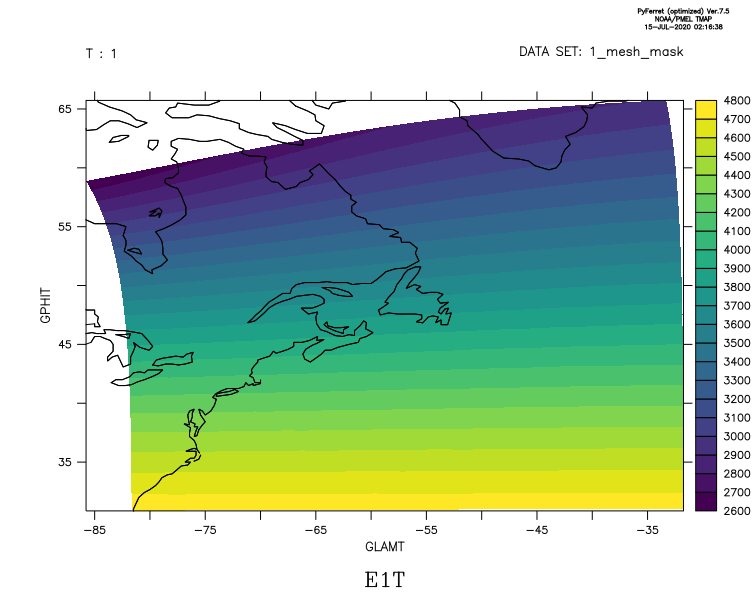

In [3]:
%%ferret
set memory /size=9000
! As in regular ferret, there are sometimes boundary errors when making
! plots in curvilinear coordinates.  To bypass this, explicitly plot
! only a subset of the data.  Also, it looks like there are issues with
! plotting too much data (perhaps running out of memory).  The kernal
! dies if I run the same command with 1783 and 1719.  Sort that out later.
shade e1t[d=1,i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land

! Enter_GO land
! Exit_GO


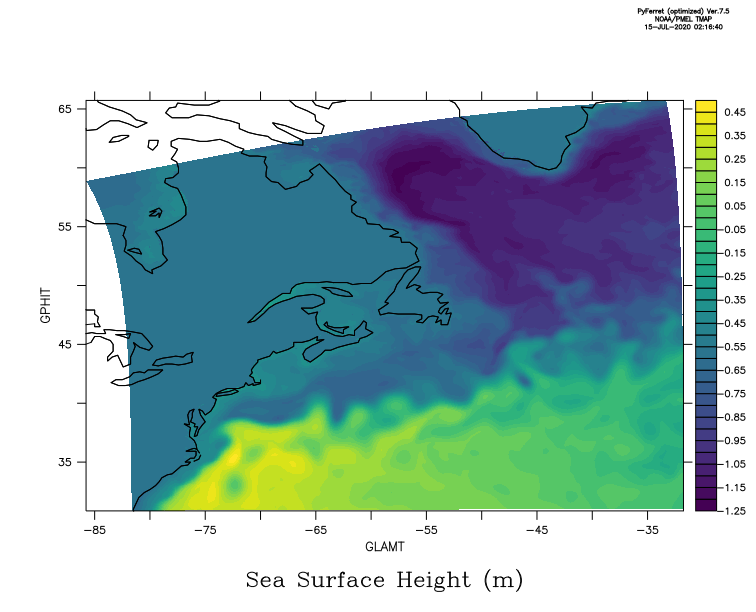

In [4]:
%%ferret
set memory /size=9000
shade sossheig[d=2,l=1,i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land

! Enter_GO land
! Exit_GO


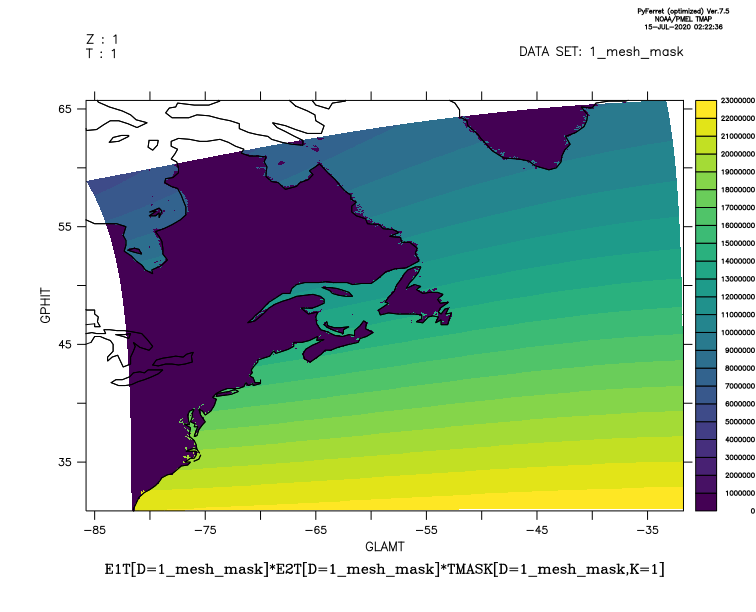

In [10]:
%%ferret
let ssh_mask = sossheig[d=2,l=1]*tmask[d=1,k=1]
let area = e1t[d=1]*e2t[d=1]*tmask[d=1,k=1]
shade area[i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land

! Enter_GO land
! Exit_GO


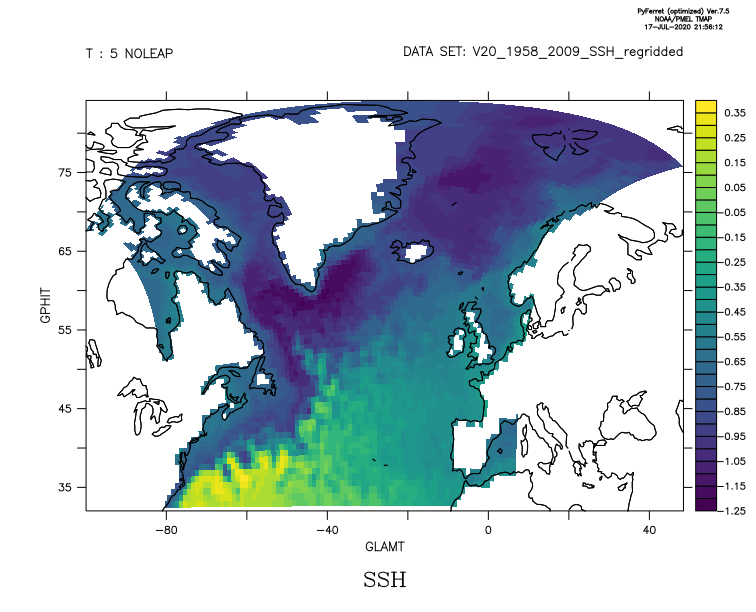

In [5]:
%%ferret
shade /i=2:2000 /j=2:2000 ssh[l=5],glamt,gphit; go land